In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
from utils import observe_condition, observe_cell_types

adata = sc.read_h5ad("../nCoV_dataset_full.h5ad")

In [2]:
print("Observation keys before observing condition and cell types")
print(adata.obs.keys())

observe_condition(adata)
observe_cell_types(adata)

print("Observation keys after observing condition and cell types")
print(adata.obs.keys())

Observation keys before observing condition and cell types
Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt',
       'seurat_clusters', 'cell_type', 'integrated_snn_res.0.8', 'Stage'],
      dtype='object')
Observation keys after observing condition and cell types
Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt',
       'seurat_clusters', 'cell_type', 'integrated_snn_res.0.8', 'Stage',
       'sample_name', 'condition', 'cell_type_name'],
      dtype='object')


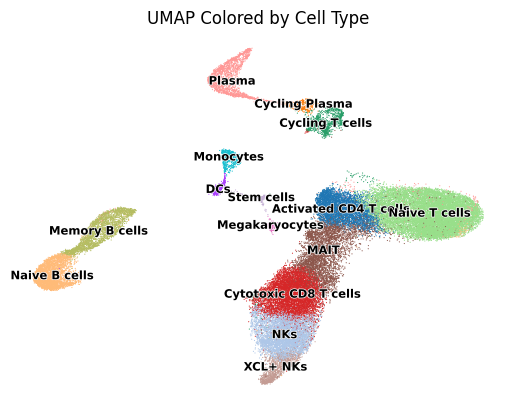

In [3]:
sc.pl.umap(
    adata,
    color="cell_type_name",
    legend_loc="on data",
    title="UMAP Colored by Cell Type",
    frameon=False,
    legend_fontsize="small",
    legend_fontoutline=1
)

In [4]:
genes = [
    "CNBP", "PFDN5", "BTF3", "SAP18", "ZFP36", "ZFP36L2", "IL10RB", "IL6R", "IL6ST",
    "IL27RA", "IL17RA", "IL2RA", "IL10RA", "IL7R", "IFNAR1", "TNFSF14", "STAT1", "IRF3",
    "TNFSF10", "TNF", "IL23A", "IFNG", "STAT3", "CHD1", "REL", "RUNX3", "BCLAF1", "JUND",
    "NFKB1", "PHF3", "CD69", "IL4R"
]

gene_to_index = {
    gene: idx for idx, gene in enumerate(adata.raw.var["_index"].values)
}
gene_indices = [gene_to_index[g] for g in genes]

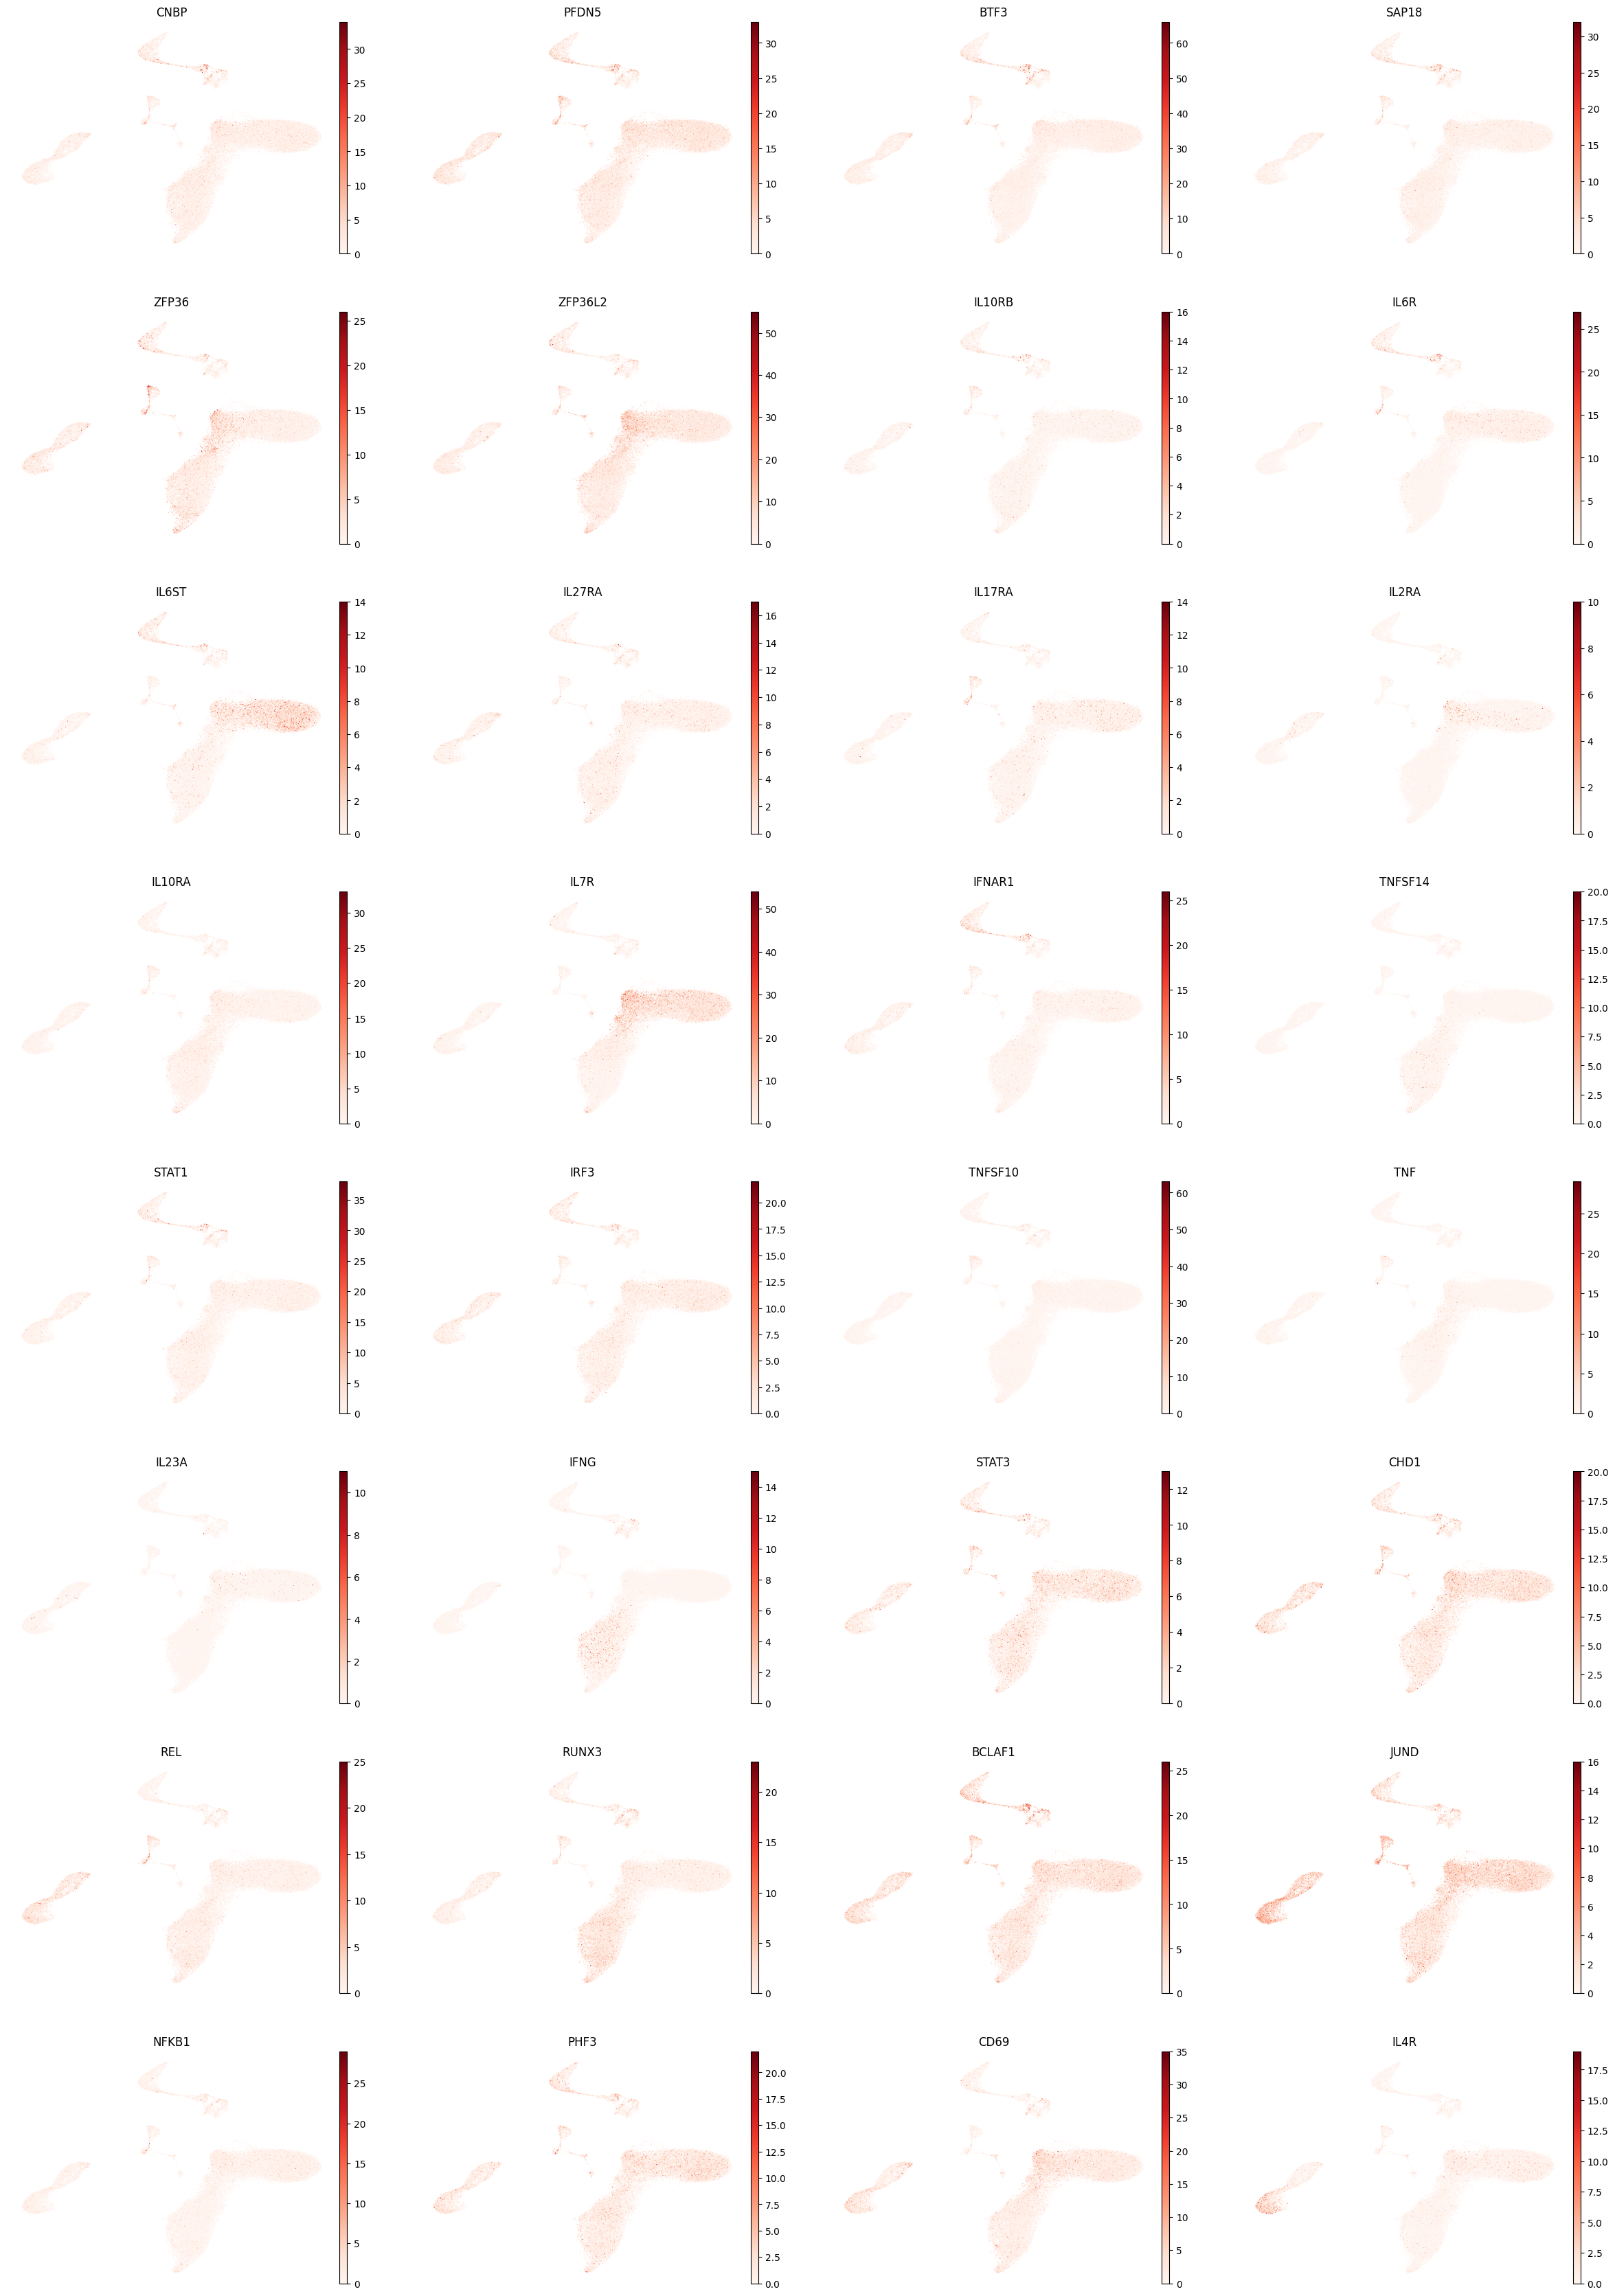

In [5]:
sc.pl.umap(
    adata,
    color=gene_indices,
    title=[f"{g}" for g in genes],
    ncols=4,
    cmap="Reds",
    use_raw=True,
    frameon=False
)


In [6]:
primary_genes = [
    "IFNG", "STAT1", "TNF", "IL6R",
]

primary_gene_indices = [gene_to_index[g] for g in primary_genes]

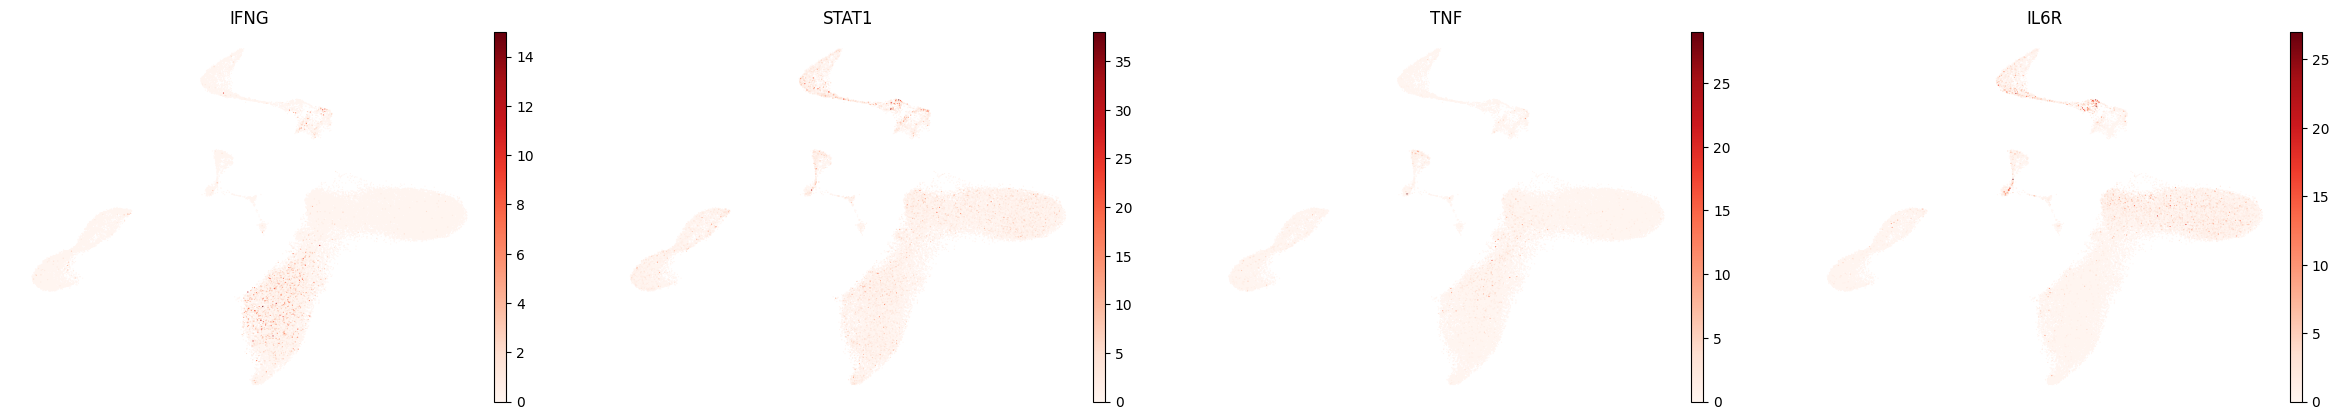

In [7]:
sc.pl.umap(
    adata,
    color=primary_gene_indices,          # your list of 32 marker genes
    title=[f"{g}" for g in primary_genes],
    ncols=4,              # display in grid
    cmap="Reds",          # expression color gradient
    use_raw=True,         # important since we stored full RNA in .raw
    frameon=False
)